In [22]:
#Import Dependancies
import pandas as pd
import pathlib as path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import datetime as dt
import seaborn as sns

In [139]:
#importing files for analysis

interest_rate_path = "Output/interest_rate_cleaned.csv"
covid_case_path = "Output/covid19_df.csv"
real_estate_csv_path = "Output/real_estate_clean.csv"


In [140]:
#Read the CSV Files
interest_rate = pd.read_csv(interest_rate_path)
covid_case = pd.read_csv(covid_case_path)
real_estate = pd.read_csv(real_estate_csv_path)

In [141]:
#display second data frame
covid_case

,reporting_year,Province_ID,Province,Province_French,date,reporting_week,update,totalcases,numtotal_last7,ratecases_total,...,numdeaths_last14,ratetotal_last14,ratedeaths_last14,avgcases_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,Month,Month_Year,Month_Year_Province
0,2020,59,British Columbia,Colombie-Britannique,2020-02-01,5,1.0,1,1.0,0.02,...,0,0.02,0,0.14,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-British Columbia
1,2020,48,Alberta,Alberta,2020-02-01,5,1.0,0,0.0,0.00,...,0,0.00,0,0.00,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-Alberta
2,2020,47,Saskatchewan,Saskatchewan,2020-02-01,5,1.0,0,0.0,0.00,...,0,0.00,0,0.00,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-Saskatchewan
3,2020,46,Manitoba,Manitoba,2020-02-01,5,1.0,0,0.0,0.00,...,0,0.00,0,0.00,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-Manitoba
4,2020,35,Ontario,Ontario,2020-02-01,5,1.0,3,0.0,0.02,...,0,0.02,0,0.00,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-Ontario
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,2024,60,Yukon,Yukon,2024-01-27,4,0.0,4989,NaN,11393.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan,Jan-2024,Jan-2024-Yukon
3131,2024,61,Northwest Territories,Territoires du Nord-Ouest,2024-01-27,4,0.0,11511,NaN,25240.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan,Jan-2024,Jan-2024-Northwest Territories
3132,2024,62,Nunavut,Nunavut,2024-01-27,4,0.0,3531,NaN,8712.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan,Jan-2024,Jan-2024-Nunavut
3133,2024,99,Repatriated travellers,Voyageurs rapatriés,2024-01-27,4,NaN,13,0.0,NaN,...,0,NaN,NaN,0.00,NaN,0.00,NaN,Jan,Jan-2024,Jan-2024-Repatriated travellers


In [154]:
# Group by province_id and calculate the total number of cases
covid_case_aggregated = covid_case.groupby(['Province']).agg({'totalcases': 'sum'})
print(covid_case_aggregated)


                           totalcases
Province                             
Alberta                      78551765
British Columbia             50000442
Canada                      544714269
Manitoba                     19002860
New Brunswick                 8629085
Newfoundland and Labrador     5455730
Northwest Territories         1221625
Nova Scotia                  13486204
Nunavut                        397217
Ontario                     188493950
Prince Edward Island          5210457
Quebec                      154999135
Repatriated travellers           2628
Saskatchewan                 18730608
Yukon                          532563


In [169]:
# Sort in descending order and get the top 3 provinces
top_provinces = covid_case_aggregated.sort_values('totalcases', ascending=False).head(6)

# # Remove rows with province name "Canada"
# top_provinces_df_no_canada = top_provinces[top_provinces['Province'] != 'Canada']

# print(top_provinces_df_no_canada)

print(top_provinces)


                  totalcases
Province                    
Canada             544714269
Ontario            188493950
Quebec             154999135
Alberta             78551765
British Columbia    50000442
Manitoba            19002860


AttributeError: 'Table' object has no attribute 'set_cell_text_props'

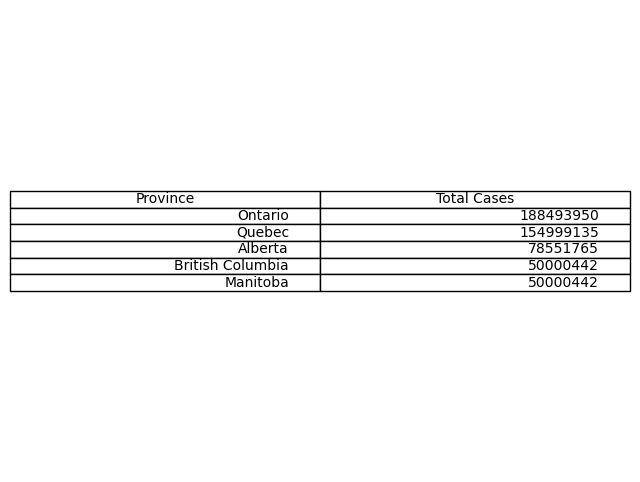

In [177]:
# defining the dataframe
top_provinces = pd.DataFrame({
    'Province': ['Ontario', 'Quebec', 'Alberta','British Columbia','Manitoba'],
    'Total Cases': [188493950, 154999135, 78551765, 50000442,50000442 ]
})

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis and gridlines
ax.axis('off')
ax.grid(False)

# Create a table from the DataFrame and adding it to the plot
table = ax.table(cellText=top_provinces.values, colLabels=top_provinces.columns, loc='center')

# Format the table by setting the cell alignment and font size
table.set_cell_text_props(ha='any')
table.scale(2, 2)

# Save the plot as a PNG image
plt.savefig('top_provinces.png')

In [157]:
# Sort in ascending order and get the top 3 provinces
bottom_provinces = covid_case_aggregated.sort_values('totalcases', ascending=True).head(6)

print(bottom_provinces)

                           totalcases
Province                             
Repatriated travellers           2628
Nunavut                        397217
Yukon                          532563
Northwest Territories         1221625
Prince Edward Island          5210457
Newfoundland and Labrador     5455730


AttributeError: 'Table' object has no attribute 'set_cell_text_props'

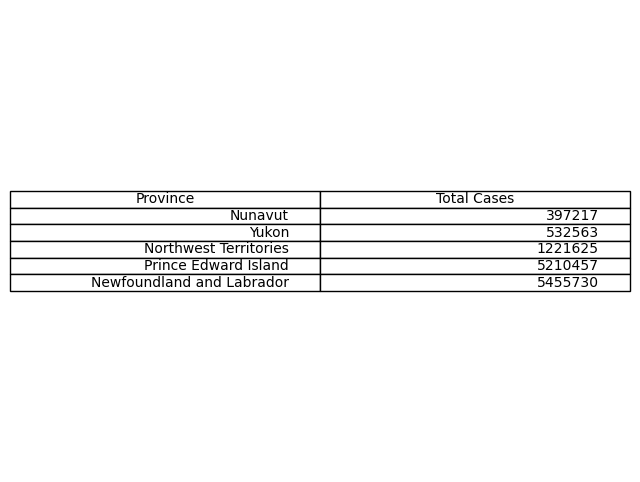

In [180]:
# defining the dataframe
bottom_provinces = pd.DataFrame({
    'Province': ['Nunavut', 'Yukon', 'Northwest Territories', 'Prince Edward Island', 'Newfoundland and Labrador'],
    'Total Cases': [397217, 532563, 1221625, 5210457, 5455730]
})

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis and gridlines
ax.axis('off')
ax.grid(False)

# Create a table from the DataFrame and add it to the plot
table = ax.table(cellText=bottom_provinces.values, colLabels=bottom_provinces.columns, loc='center')

# Format the table by setting the cell alignment and font size
table.set_cell_text_props(ha='center')
table.scale(1.5, 1.5)

# Save the plot as a PNG image
plt.savefig('bottom_provinces.png')